In [1]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

In [2]:
accounts = pd.read_csv('data/account.csv', sep=';')
cards_dev = pd.read_csv('data/card_dev.csv', sep=';')
clients = pd.read_csv('data/client.csv', sep=';')
disp = pd.read_csv('data/disp.csv', sep=';')
districts = pd.read_csv('data/district.csv', sep=';')
loans_dev = pd.read_csv('data/loan_dev.csv', sep=';')
trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')

C:\Users\nrtc\AppData\Local\Temp\ipykernel_5628\1239521831.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')


In [93]:
from math import ceil
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# These columns will be used as the inputs of the models
input_cols = merged_df.columns

# remove 'status' from the inputs
input_cols = input_cols.drop('status')

# The output columns are the genres
output_col = 'status'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

In [94]:
def evaluate_model(model, testing_inputs, testing_classes, output_cols, sample_weight=None):
    """
    This helper function prints the report and evaluation metrics for the model.
    """
    predictions = model.predict(testing_inputs)

    print("="*70)
    print(f"Evaluation metrics for {model.__class__.__name__}")
    print("="*70)

    score = model.score(testing_inputs, testing_classes) 
    print(f"{model.__class__.__name__}'s default score metric: {score}")


    print("Classification report")
    print(
        classification_report(testing_classes, predictions, sample_weight=sample_weight, digits=4, zero_division=1)
    )

    accuracy = accuracy_score(testing_classes, predictions, sample_weight=sample_weight)
    print(f"Accuracy: {accuracy:.4f}")

    f1 = f1_score(testing_classes, predictions, sample_weight=sample_weight, average='weighted')
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(testing_classes, predictions, sample_weight=sample_weight)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print("="*70)

In [95]:
def train_and_evaluate(input_cols, output_cols, model, params, n_iter=None, sample_weight=None, random_state=42, scoring='accuracy', tuning=True):
    """
    This function trains the model and prints the evaluation metrics, as well as the confusion matrices, and learning and scalability plots.
    """
    inputs = merged_df[input_cols].values
    classes = merged_df[output_cols].values
    
    """scaler = StandardScaler()
    X_train = scaler.fit_transform(train_preprocessed_df[input_cols])
    X_test = scaler.fit_transform(test_preprocessed_df[output_cols])
    oversample = SMOTETomek(random_state=random_state)
    inputs, classes = oversample.fit_resample(inputs, classes)
    counter = Counter(classes)
    plt.bar(counter.keys(), counter.values())
    plt.show()"""
    

    
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(inputs, classes, test_size=0.2, random_state=random_state)
    if tuning:
        if n_iter == None:
            clf = GridSearchCV(model, params, n_jobs=-1, cv=5)
        else:
            clf = RandomizedSearchCV(
                model, params, n_iter=n_iter, scoring=scoring,
                n_jobs=-1, cv=5, random_state=random_state)
    else:
        clf = model
    
    clf.fit(training_inputs, training_classes)

    if tuning:
        print(f"Best params for {model.__class__.__name__}: {clf.best_params_}")
        
    evaluate_model(clf, testing_inputs, testing_classes, output_cols, sample_weight=sample_weight)
    
    return clf

In [104]:
def use_model(model, params = {}, scoring='accuracy', n_iter=None, random_state=42, tuning=True):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    return train_and_evaluate(input_cols, output_col, model, params, n_iter=n_iter, random_state=random_state, scoring=scoring, tuning=tuning)

In [97]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

level0 = list()
level0.append(('lr', LogisticRegression() ))
level0.append(('rf', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('lgbm', LGBMClassifier()))

level1 = CatBoostClassifier()
clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)

C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

Learning rate set to 0.005796
0:	learn: 0.6884004	total: 1.61ms	remaining: 1.61s
1:	learn: 0.6840189	total: 2.42ms	remaining: 1.21s
2:	learn: 0.6789109	total: 3.51ms	remaining: 1.17s
3:	learn: 0.6748041	total: 4.17ms	remaining: 1.04s
4:	learn: 0.6706299	total: 4.86ms	remaining: 966ms
5:	learn: 0.6662099	total: 5.94ms	remaining: 985ms
6:	learn: 0.6619731	total: 7.06ms	remaining: 1s
7:	learn: 0.6578933	total: 8.14ms	remaining: 1.01s
8:	learn: 0.6535538	total: 9.24ms	remaining: 1.02s
9:	learn: 0.6496073	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6456241	total: 11.4ms	remaining: 1.02s
11:	learn: 0.6417654	total: 12.2ms	remaining: 1s
12:	learn: 0.6380851	total: 12.8ms	remaining: 973ms
13:	learn: 0.6344083	total: 13.7ms	remaining: 966ms
14:	learn: 0.6302234	total: 14.8ms	remaining: 971ms
15:	learn: 0.6266273	total: 16ms	remaining: 986ms
16:	learn: 0.6228192	total: 17.2ms	remaining: 993ms
17:	learn: 0.6194484	total: 18.3ms	remaining: 998ms
18:	learn: 0.6160054	total: 19.4ms	remaining: 1s
19:

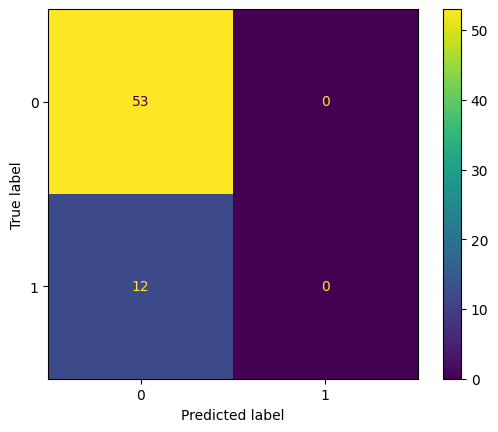

RandomizedSearchCV(cv=5,
                   estimator=StackingClassifier(cv=4,
                                                estimators=[('lr',
                                                             LogisticRegression()),
                                                            ('rf',
                                                             DecisionTreeClassifier()),
                                                            ('xgb',
                                                             XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           gamma=None,
                                                                           gpu_id=N...
                                                                           min_child_weight=None,
                                                                           missing=nan,
                                                                           monotone_constraints=None,
                                                                           n_estimators=100,
                                                                           n_jobs=None,
                                                                           num_parallel_tree=None,
                                                                           predictor=None,
                                                                           random_state=None,
                                                                           reg_alpha=None,
                                                                           reg_lambda=None, ...)),
                                                            ('lgbm',
                                                             LGBMClassifier())],
                                                final_estimator=<catboost.core.CatBoostClassifier object at 0x000001CE5CCE65F0>),
                   n_iter=50, n_jobs=-1, param_distributions={},
                   random_state=42, scoring='accuracy')

In [98]:
use_model(
    clf
)

Best params for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 4}
Evaluation metrics for GridSearchCV
GridSearchCV's default score metric: 0.8153846153846154
Classification report
              precision    recall  f1-score   support

           0     0.8154    1.0000    0.8983        53
           1     1.0000    0.0000    0.0000        12

    accuracy                         0.8154        65
   macro avg     0.9077    0.5000    0.4492        65
weighted avg     0.8495    0.8154    0.7325        65

Accuracy: 0.8154
F1-Score: 0.7325


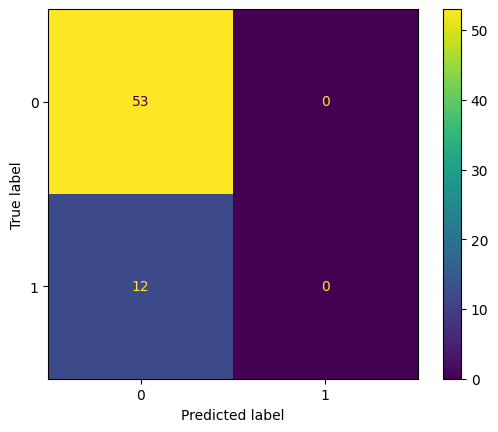

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [107]:
use_model(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],	
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    scoring='recall',
)